In [2]:
## RETURN FORECASTING HW

import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

In [3]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration

yen_futures = pd.read_csv(
    Path("/Users/aaronbsechler/Downloads/02-Homework_10-Time-Series_Instructions_Starter_Code_yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [4]:
# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


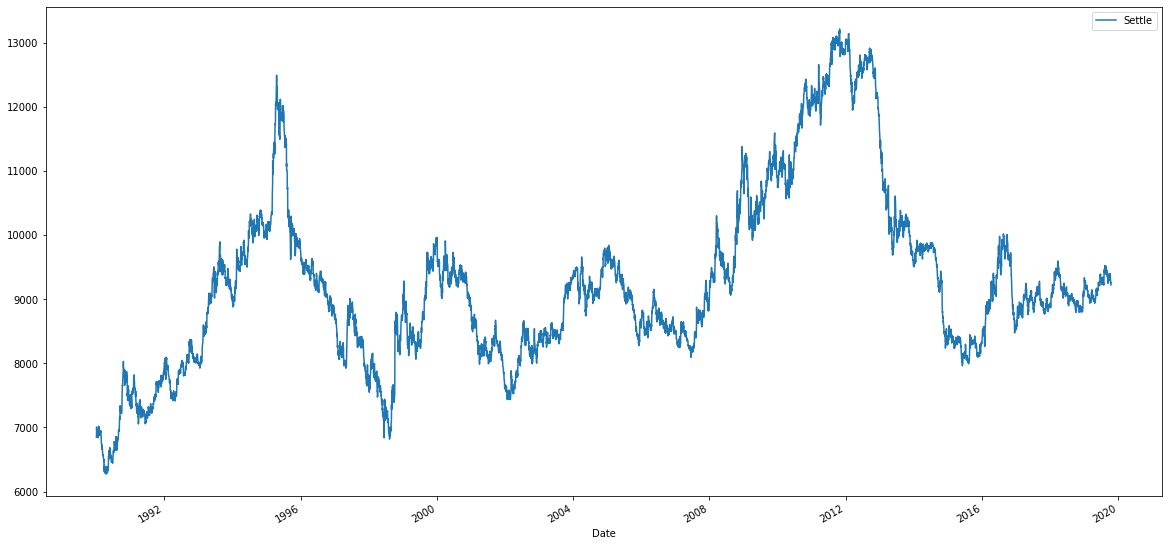

In [5]:
## RETURN FORECASTING: Initial Time-Series Plotting

# Plot just the "Settle" column from the dataframe:

yen_futures["Settle"].plot(legend=("best"), figsize=(20,10))

In [6]:
# Start by plotting the "Settle" price. Do you see any patterns, long-term and/or short?

# My initial impression is that the basic trend is slightly upward, and there are two different repeating
# patterns in the data. the first pattern is made up of the two large spikes in 1995 and 2011, and the other 
# comprised of the three smaller spikes in 2000, 2004, and 2016.

In [7]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the "Settle" price into two separate series:

settle_noise, settle_trend = sm.tsa.filters.hpfilter(yen_futures['Settle'])


In [8]:
# Create a dataframe of just the settle price, and add columns for "noise" and "trend" series from above:

settle_df = yen_futures[["Settle"]].copy()
settle_df["Noise"] = settle_noise
settle_df["Trend"] = settle_trend

settle_df.head()


,Settle,Noise,Trend
Date,,,
1990-01-02,6847.0,-61.503967,6908.503967
1990-01-03,6887.0,-21.799756,6908.799756
1990-01-04,7008.0,98.942896,6909.057104
1990-01-05,6950.0,40.776052,6909.223948
1990-01-08,6959.0,49.689938,6909.310062


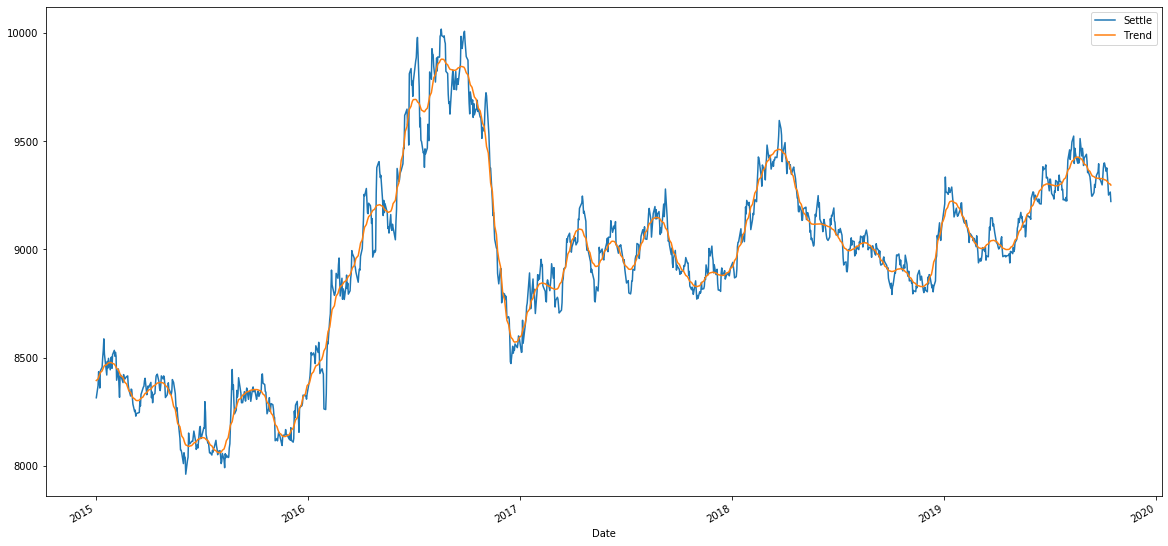

In [9]:
# Plot the Settle Price vs. the Trend for 2015 to the present

settle_df[["Settle", "Trend"]].loc["2015":].plot(legend=("best"), figsize=(20,10))

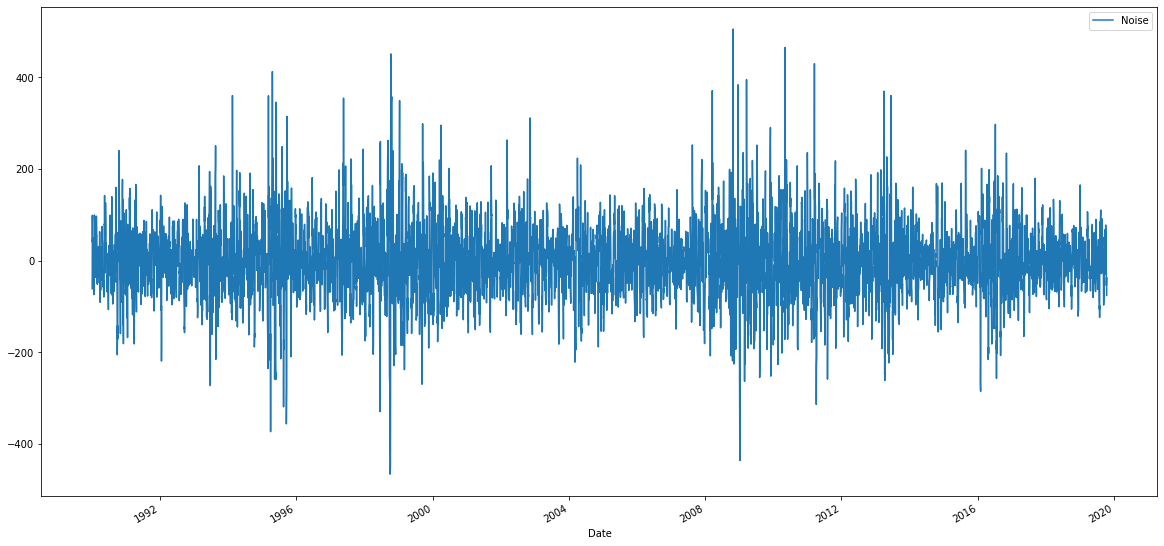

In [10]:
# Plot the Settle Noise

settle_df['Noise'].plot(legend=("best"), figsize=(20,10))

In [11]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (yen_futures[["Settle"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Settle
Date,
2019-10-09,-0.410601
2019-10-10,-0.369458
2019-10-11,-0.564304
2019-10-14,0.151335
2019-10-15,-0.469509


In [12]:
import statsmodels.api as sm

# Estimate and ARMA model using statsmodels (use order=(2, 1))

from statsmodels.tsa.arima_model import ARMA

arma_model = ARMA(returns.values, order=(2,1))

# Fit the model and assign it to a variable called results

arma_results = arma_model.fit()

In [13]:
# Output model summary results:

arma_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7514
Model:                     ARMA(2, 1)   Log Likelihood               -7894.071
Method:                       css-mle   S.D. of innovations              0.692
Date:                Mon, 31 Aug 2020   AIC                          15798.142
Time:                        19:07:12   BIC                          15832.765
Sample:                             0   HQIC                         15810.030
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.008      0.804      0.422      -0.009       0.022
ar.L1.y       -0.3063      1.277     -0.240      0.810      -2.810       2.197
ar.L2.y       -0.0019      0.019     -0.099      0.921      -0.040       0.036
ma.L1.y        0.2947      1.277      0.231      0.818      -2.209       2.798
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3342           +0.0000j            3.3342            0.5000
AR.2         -157.1635           +0.0000j          157.1635            0.5000
MA.1           -3.3930           +0.0000j            3.3930            0.5000
-----------------------------------------------------------------------------
"""

In [15]:
#Using the raw Yen Settle Price, estimate an ARIMA model.
#Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
#P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags


#Output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
#Construct a 5 day forecast for the Settle Price. What does the model forecast will happen to the Japanese Yen in the near term?

from statsmodels.tsa.arima_model import ARIMA

settle_data = yen_futures["Settle"]

arima_model = ARIMA(settle_data, order=(5, 1, 1))

arima_results = arima_model.fit()

/Users/aaronbsechler/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/aaronbsechler/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [16]:
arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Settle   No. Observations:                 7514
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -41944.619
Method:                       css-mle   S.D. of innovations             64.281
Date:                Mon, 31 Aug 2020   AIC                          83905.238
Time:                        20:42:33   BIC                          83960.635
Sample:                             1   HQIC                         83924.259
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3161      0.700      0.452      0.652      -1.056       1.688
ar.L1.D.Settle     0.2823      0.699      0.404      0.686      -1.088       1.652
ar.L2.D.Settle     0.0007      0.016      0.043      0.966      -0.030       0.032
ar.L3.D.Settle    -0.0126      0.012     -1.032      0.302      -0.037       0.011
ar.L4.D.Settle    -0.0137      0.015     -0.889      0.374      -0.044       0.016
ar.L5.D.Settle    -0.0012      0.018     -0.064      0.949      -0.036       0.034
ma.L1.D.Settle    -0.2973      0.699     -0.425      0.671      -1.667       1.073
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8919           -1.3785j            2.3409           -0.1002
AR.2            1.8919           +1.3785j            2.3409            0.1002
AR.3           -2.2707           -3.0203j            3.7787           -0.3526
AR.4           -2.2707           +3.0203j            3.7787            0.3526
AR.5          -11.0894           -0.0000j           11.0894           -0.5000
MA.1            3.3633           +0.0000j            3.3633            0.0000
-----------------------------------------------------------------------------
"""

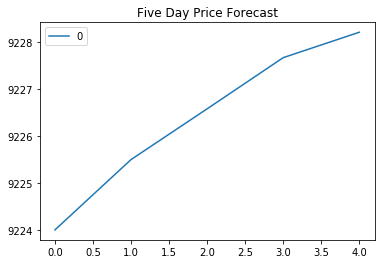

In [18]:
# Plot the 5 Day Price Forecast

pd.DataFrame(arima_results.forecast(steps=5)[0]).plot(title="Five Day Price Forecast")

In [55]:
# Volatility Forecasting with GARCH

# Rather than predicting returns, let's forecast near-term volatility of Japanese Yen futures returns. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.Using futures Settle Returns, estimate an GARCH model
# GARCH: Create an GARCH model and fit it to the returns data. Note: Set the parameters to p=2 and q=1: order=(2, 1).
# Output the GARCH summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
# Plot the 5-day forecast of the volatility.

# the following code is needed because my notebooks don't always have what's installed in my environements.

import arch

from arch import arch_model

# 'p' and 'q'  are akin to the 'p' and 'q' of an ARMA model.

# 'vol="GARCH"' means that we're using a GARCH model.

# The 'mean="Zero"' means that we're estimating a GARCH.

garch_model = arch_model(returns, mean="Zero", vol="GARCH", p=1, q=1)

# Fit the GARCH Model
garch_results = garch_model.fit(disp="off")

In [56]:
# Summarize the model results

garch_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Settle   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7461.93
Distribution:                  Normal   AIC:                           14929.9
Method:            Maximum Likelihood   BIC:                           14950.6
                                        No. Observations:                 7514
Date:                Mon, Aug 31 2020   Df Residuals:                     7511
Time:                        17:51:43   Df Model:                            3
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.2895e-03  1.798e-03      2.385  1.707e-02 [7.646e-04,7.814e-03]
alpha[1]       0.0381  8.773e-03      4.341  1.419e-05 [2.089e-02,5.528e-02]
beta[1]        0.9536  1.114e-02     85.623      0.000     [  0.932,  0.975]
============================================================================

Covariance estimator: robust
"""

In [57]:
 # Find the last day of the dataset
    
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2019-10-15'

In [59]:
# Create a 5 day forecast of volatility

forecast_horizon = 5

# Start the forecast using the last_day calculated above

forecasts = res.forecast(start=last_day, horizon=forecast_horizon)
forecasts

In [60]:
# Annualize the forecast

intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2019-10-15,7.434026,7.475721,7.516842,7.5574,7.597407


In [61]:
 # Transpose the forecast so that it is easier to plot

final = intermediate.dropna().T
final.head()

Date,2019-10-15
h.1,7.434026
h.2,7.475721
h.3,7.516842
h.4,7.557400
h.5,7.597407


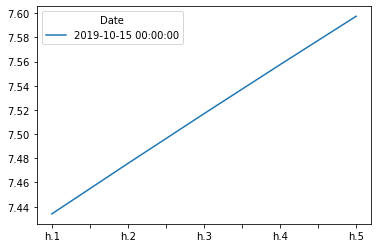

In [62]:
# Plot the final forecast

final.plot()

# Based on your time series analysis, would you buy the yen now?

# I don't think either the Arma or Arima models are accurate enough to make a purchase because of the very low P values, and
# while the P value of the GARCH is low enough to be confident in the model it's not showing the kind of volativity that you
# want to be able to trade it. the five day forecast, even if it were accurate, doesn't show enough growth to make it an 
# attractive purchase (although I guess I don't know what kind of rate of return is worth it to a real investor.)

# Is the risk of the yen expected to increase or decrease?

# The risk of the yen is supposed to steadily increase by a small amount over the next five days.

# Based on the model evaluation, would you feel confident in using these models for trading?

# The GARCH model seems accurate enough to be used but the other two don't, so I feel like I can rely on the garch's recommendation
# not to make a purchase.